Import Block

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Data Exploratory


In [2]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/christiandoxa/usahaq_ml/master/Dataset/Dataset%20Penjualan/data-penjualan-ayam.csv?token=ARB4LTCNDT6GBLEFQ4VOWN3AW6BEC \
    -O /tmp/chicken-sales.csv

--2021-05-27 12:45:52--  https://raw.githubusercontent.com/christiandoxa/usahaq_ml/master/Dataset/Dataset%20Penjualan/data-penjualan-ayam.csv?token=ARB4LTCNDT6GBLEFQ4VOWN3AW6BEC
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16364 (16K) [text/plain]
Saving to: ‘/tmp/chicken-sales.csv’

/tmp/chicken-sales. 100%[===================>]  15.98K  --.-KB/s    in 0s      

2021-05-27 12:45:52 (108 MB/s) - ‘/tmp/chicken-sales.csv’ saved [16364/16364]



In [3]:
#Read dataset with pandas, then put it to chicken_sales_df variable
chicken_sales_df = pd.read_csv('/tmp/chicken-sales.csv')
chicken_sales_df

id         tgl  bulan  tahun  ...  bayaran supir  plat_mobil  ket
0     80  2018-01-01      1   2018  ...  2009465   NaN         NaN    2
1    189  2018-01-01      1   2018  ...  1568100   NaN         NaN    2
2    158  2018-01-02      1   2018  ...  2407960   NaN         NaN    1
3    108  2018-01-19      1   2018  ...   969280   NaN         NaN    1
4    221  2018-01-23      1   2018  ...  2578696   NaN         NaN    1
..   ...         ...    ...    ...  ...      ...   ...         ...  ...
216   65  2021-11-26     11   2021  ...  2148552   NaN         NaN    1
217   94  2021-11-28     11   2021  ...  1616600   NaN         NaN    1
218   91  2021-12-22     12   2021  ...  1387120   NaN         NaN    2
219  206  2021-12-22     12   2021  ...   773842   NaN         NaN    2
220  161  2021-12-23     12   2021  ...  1268060   NaN         NaN    1

[221 rows x 16 columns]

In [4]:
#Keep only tgl and jumlah_ayam column
cols = ['tgl', 'jumlah_ayam']
chicken_sales_df = chicken_sales_df[cols]
chicken_sales_df

tgl  jumlah_ayam
0    2018-01-01          115
1    2018-01-01          116
2    2018-01-02          148
3    2018-01-19           65
4    2018-01-23          136
..          ...          ...
216  2021-11-26          147
217  2021-11-28          100
218  2021-12-22          108
219  2021-12-22           54
220  2021-12-23           71

[221 rows x 2 columns]

In [5]:
#Inspect the first 5 of chicken_sales_df dataframe
chicken_sales_df.head()

tgl  jumlah_ayam
0  2018-01-01          115
1  2018-01-01          116
2  2018-01-02          148
3  2018-01-19           65
4  2018-01-23          136

In [6]:
#Inspect the last 5 of chicken_sales_df dataframe
chicken_sales_df.tail()

tgl  jumlah_ayam
216  2021-11-26          147
217  2021-11-28          100
218  2021-12-22          108
219  2021-12-22           54
220  2021-12-23           71

In [7]:
#Inspect the describtion of chicken_sales_df dataframe
chicken_sales_df.describe()

jumlah_ayam
count   221.000000
mean    106.506787
std      33.800299
min      51.000000
25%      77.000000
50%     104.000000
75%     136.000000
max     166.000000

In [8]:
#Casting jumlah_ayam's column to float
chicken_sales_df['jumlah_ayam'] = pd.to_numeric(chicken_sales_df['jumlah_ayam'], downcast='float')
print(chicken_sales_df)
print(chicken_sales_df.dtypes)

            tgl  jumlah_ayam
0    2018-01-01        115.0
1    2018-01-01        116.0
2    2018-01-02        148.0
3    2018-01-19         65.0
4    2018-01-23        136.0
..          ...          ...
216  2021-11-26        147.0
217  2021-11-28        100.0
218  2021-12-22        108.0
219  2021-12-22         54.0
220  2021-12-23         71.0

[221 rows x 2 columns]
tgl             object
jumlah_ayam    float32
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
#Normalize jumlah_ayam's column data by dividing it with the largest number
max = chicken_sales_df.loc[:,'jumlah_ayam'].max()
# chicken_sales_df.loc[:,'jumlah_ayam'] /= max
print(max)

166.0


In [10]:
chicken_sales_df

tgl  jumlah_ayam
0    2018-01-01        115.0
1    2018-01-01        116.0
2    2018-01-02        148.0
3    2018-01-19         65.0
4    2018-01-23        136.0
..          ...          ...
216  2021-11-26        147.0
217  2021-11-28        100.0
218  2021-12-22        108.0
219  2021-12-22         54.0
220  2021-12-23         71.0

[221 rows x 2 columns]

In [11]:
_ = chicken_sales_df.hist()

In [12]:
#Get the chicken sales and time step from dataframe
temp = chicken_sales_df['jumlah_ayam']
sales = np.array(temp.tolist())
time = np.array([i[0] for i in enumerate(sales)])

In [13]:
#Helper function for plotting dataset
def plot_dataset(time, series, title, xlabel, ylabel, color='b'):
  plt.plot(time, series, '{}-'.format(color))
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid=True

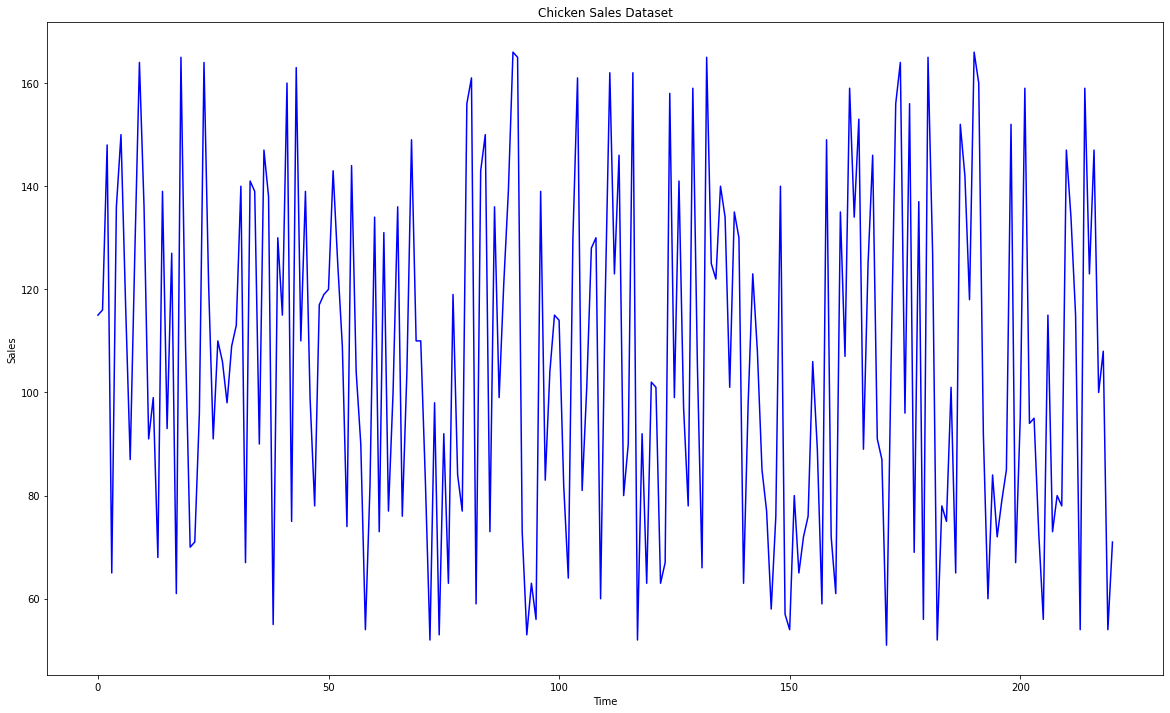

In [14]:
#Plot the dataset
plt.figure(figsize=(20, 12))
plot_dataset(time=time, series=sales, color='b', title='Chicken Sales Dataset', xlabel='Time', ylabel='Sales')

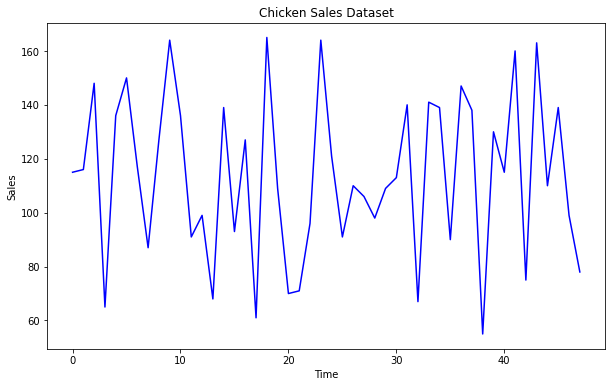

In [15]:
plt.figure(figsize=(10, 6))
plot_dataset(time=time[:48], series=sales[:48], color='b', title='Chicken Sales Dataset', xlabel='Time', ylabel='Sales')

Split Train and Test

In [16]:
#Split dataset with 80% of training and the rest for testing
split = round(0.8*len(sales))
train_sales = sales[:split]
train_time = time[:split]
test_sales = sales[split:]
test_time = time[split:]

Window the Dataset 

In [17]:
#Helper function for windowing the dataset
def dataset_window(list, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(temp, axis=-1)
  data_window = tf.data.Dataset.from_tensor_slices(series)
  data_window = data_window.window(window_size + 1, shift = 1, drop_remainder= True)
  data_window = data_window.flat_map(lambda x: x.batch(window_size+1))
  data_window = data_window.shuffle(shuffle_buffer)
  data_window = data_window.map(lambda x: (x[:-1], x[1:]))
  data_window = data_window.batch(batch_size).prefetch(1)
  return data_window

Function for Forecasting the Model for Fit It Into the Plotted Graph

In [18]:
#Helper function for forecasting
def forecast_model(model, series, window_size):
  data_forecast = tf.data.Dataset.from_tensor_slices(series)
  data_forecast = data_forecast.window(window_size, shift=1, drop_remainder=True)
  data_forecast = data_forecast.flat_map(lambda x: x.batch(window_size))
  data_forecast = data_forecast.batch(32).prefetch(1)
  print(data_forecast)
  forecast = model.predict(data_forecast)
  return forecast

Window Size, Batch Size, & Shuffle Buffer

In [19]:
window_size = 8
batch_size = 32
shuffle_buffer = 250

Build the Model

In [20]:
#Building model with learning rate scheduler, so we can pick the best learning rate
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = dataset_window(train_sales, window_size, batch_size, shuffle_buffer)

print(train_set)
print(train_sales.shape)

model = tf.keras.models.Sequential([
          tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1,
                                 padding='causal', activation='relu',
                                 input_shape=[None,1]),
          tf.keras.layers.LSTM(64, return_sequences=True),
          tf.keras.layers.LSTM(64, return_sequences=True),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dense(8, activation='relu'),
          tf.keras.layers.Dense(1),
          tf.keras.layers.Lambda(lambda x : x*max)
])
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda x: 1e-5 * 10**(x/20))
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9),
              metrics=['mae'])
history = model.fit(train_set, epochs=100, callbacks=[learning_rate_scheduler])

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float32, tf.float32)>
(177,)
Epoch 1/100
7/7 [==============================] - 35s 15ms/step - loss: 103.5514 - mae: 104.0514
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 83.8281 - mae: 84.3281
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 53.0429 - mae: 53.5406
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 31.3581 - mae: 31.8556
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 30.1493 - mae: 30.6462
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 29.9406 - mae: 30.4389
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 28.6874 - mae: 29.1842
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 28.8790 - mae: 29.3759
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 28.6399 - mae: 29.1366
Epoch 10/100
7/7 [==============================]

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 64)          384       
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dense (Dense)                (None, None, 32)          2080      
_________________________________________________________________
dense_1 (Dense)              (None, None, 16)          528       
_________________________________________________________________
dense_2 (Dense)              (None, None, 8)           136       
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           9

(1e-05, 0.1, 20.0, 50.0)

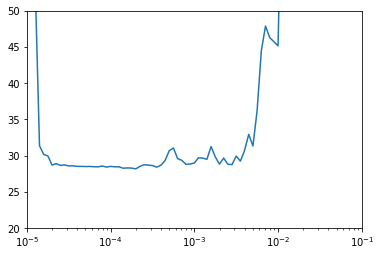

In [22]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-5, 1e-1, 20, 50])

In [75]:
#Build the final model with the best learning rate
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = dataset_window(train_sales, window_size, batch_size, shuffle_buffer)
print(train_set)
print(train_sales.shape)

model = tf.keras.models.Sequential([
          tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1,
                                 padding='causal', activation='relu',
                                 input_shape=[None,1]),
          tf.keras.layers.LSTM(64, return_sequences=True),
          tf.keras.layers.LSTM(64, return_sequences=True),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dense(8, activation='relu'),
          tf.keras.layers.Dense(1),
          tf.keras.layers.Lambda(lambda x : x*max)
])
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.7),
              metrics=['mae'])
history = model.fit(train_set, epochs=300)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(177,)
Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 102.8735 - mae: 103.3735
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 97.3829 - mae: 97.8829
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 87.9703 - mae: 88.4703
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 75.9828 - mae: 76.4828
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 62.3799 - mae: 62.8799
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 47.7142 - mae: 48.2107
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 35.4776 - mae: 35.9768
Epoch 8/300
1/1 [==============================] - 0s 17ms/step - loss: 29.0382 - mae: 29.5314
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 27.6524 - mae: 28.1441
Epoch 10/300
1/1 [==========================

In [76]:
#Forecasting the testing data
rnn_forecast = forecast_model(model, sales[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split - window_size:-1, -1, 0]

<PrefetchDataset shapes: (None, None, 1), types: tf.float64>


In [77]:
#Plotting the testing data
plt.figure(figsize=(10, 6))
plot_dataset(time=test_time, series=test_sales, title='Chicken Sales Prediction for Data Testing',xlabel='Time', ylabel='Sales')
plot_dataset(time=test_time, series=rnn_forecast, title='Chicken Sales Prediction for Data Testing', xlabel='Time', ylabel='Sales', color='r')

<Figure size 432x288 with 0 Axes>

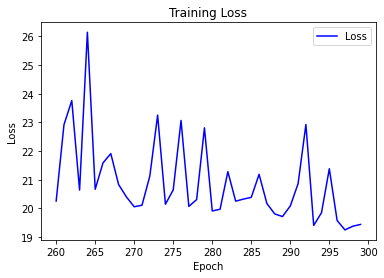

<Figure size 432x288 with 0 Axes>

In [78]:
#Plotting and examining the training loss
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']

epoch_num=range(len(loss))

plot_dataset(epoch_num, loss, title='Training Loss', xlabel='Epoch', ylabel='Loss')
plt.legend(["Loss"])
plt.figure()

loss_zoom = loss[260:]
epoch_num_zoom = [x+260 for x in range(len(loss_zoom))]

plot_dataset(epoch_num_zoom, loss_zoom, title='Training Loss', xlabel='Epoch', ylabel='Loss')
plt.legend(["Loss"])
plt.figure()

In [79]:
rnn_forecast

array([ 69.947296,  78.71932 ,  71.81179 ,  85.6377  , 102.211365,
       128.27655 ,  92.47606 , 126.26701 ,  93.096275, 115.03457 ,
       100.209984, 103.12329 ,  87.02495 ,  66.72808 ,  92.890175,
        64.79613 ,  63.330296,  80.52939 ,  87.00411 , 107.54833 ,
        97.153946,  69.73976 ,  73.004074,  78.652534,  75.285645,
        80.07254 ,  90.94258 ,  62.882675,  62.73914 ,  93.926476,
        64.55573 ,  71.4814  ,  64.38695 ,  98.89362 , 112.61858 ,
       103.619095,  70.40737 , 113.05443 , 106.831085, 113.04067 ,
        82.679405, 103.01714 ,  66.99987 ,  84.10471 ], dtype=float32)

In [97]:
temp = len(test_sales)-31
temp_1 = len(test_sales)-1
temp=test_sales[temp:temp_1]

In [98]:
test = np.array([])
rnn_forecast = forecast_model(model, temp[..., np.newaxis],len(temp)).tolist()
rnn_forecast

<PrefetchDataset shapes: (None, None, 1), types: tf.float64>


[[[92.6751708984375],
  [98.07630920410156],
  [85.0631332397461],
  [114.27537536621094],
  [101.23641204833984],
  [105.33982849121094],
  [74.83137512207031],
  [69.73976135253906],
  [69.33256530761719],
  [69.53599548339844],
  [68.65703582763672],
  [67.77883911132812],
  [83.44783782958984],
  [60.847843170166016],
  [64.27503204345703],
  [93.32278442382812],
  [65.20549774169922],
  [72.60861206054688],
  [61.31833267211914],
  [73.5107421875],
  [86.59417724609375],
  [75.63983154296875],
  [65.84939575195312],
  [95.1352767944336],
  [89.82785034179688],
  [104.98216247558594],
  [74.6585693359375],
  [81.83899688720703],
  [62.98311996459961],
  [69.97480010986328]]]

In [99]:
round(rnn_forecast[-1][-1][0])

70

In [100]:
model.save("chicken_sales_model")

INFO:tensorflow:Assets written to: chicken_sales_model/assets


INFO:tensorflow:Assets written to: chicken_sales_model/assets


In [101]:
!zip -r chicken_sales_model.zip chicken_sales_model

updating: chicken_sales_model/ (stored 0%)
updating: chicken_sales_model/keras_metadata.pb (deflated 91%)
updating: chicken_sales_model/variables/ (stored 0%)
updating: chicken_sales_model/variables/variables.index (deflated 69%)
updating: chicken_sales_model/variables/variables.data-00000-of-00001 (deflated 8%)
updating: chicken_sales_model/saved_model.pb (deflated 90%)
updating: chicken_sales_model/assets/ (stored 0%)
